In [1]:
# Scientific
import numpy as np
import pandas as pd
from scipy import stats
from scipy import interp
import statsmodels

# General
import itertools
import copy
import re
from datetime import datetime
import random
import timeit
from itertools import cycle


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns


# Causal Impact
from causalimpact import CausalImpact



In [2]:
### Loading Data
data = pd.read_csv('./Data/ml_df.csv')
data = data.drop(['Unnamed: 0', 'Classes'], axis = 1)

### Light processing
data = data.loc[data.ProtocolPhase != '0', :]
data = data.loc[data.CRO != '0', :]

#data.DBL_ActualDate = pd.to_datetime(data.DBL_ActualDate)
new_vals = data.groupby(by=['DBL_ActualDate']).agg({'CRO': 'count', 'CloseOut': 'median'}).reset_index()['CloseOut']
data['CloseOutMed'] = new_vals
data.CloseOutMed = data.CloseOutMed.replace(np.nan, data.CloseOutMed.median()) 
data = data.sort_values(by = 'DBL_ActualDate')
data = data.drop_duplicates(subset=['DBL_ActualDate'])

# Data for TS Decomp
ts_data = copy.deepcopy(data)

# Data for CI
data = data.set_index('DBL_ActualDate')

In [3]:
# Brief data processing to prepare for CI
def OHE_column(df, col):
    '''
    Input: Dataframe and desired column to one-hot-encode
    Action: One-hot-encodes a given column 
    Output: Returns dataframe, inclusie of one-hot-encoded column
    '''
    
    one_hot_cols = pd.get_dummies(df[col])
    
    df = df.drop([col],axis = 1)
    # Join the encoded df
    df = df.join(one_hot_cols)
    
    return df

In [4]:
# OHE of columns 
cols_to_encode = ['CRO', 'TA', 'ProtocolPhase']

for col in cols_to_encode:
    data = OHE_column(data, col)


### Evaluating Causal Impact

In [5]:
pre_period = ['2012-03-02', '2020-03-17'] # Pre-COVID period
post_period = ['2020-04-06', '2021-06-25'] # Post-COVID period

In [6]:
ci = CausalImpact(data, pre_period, post_period, model_args = {'fit_method': 'hmc'})

In [7]:
print(ci.summary())

AttributeError: 'CausalImpact' object has no attribute 'inferences'

In [ ]:
ci.plot()

### Trend-seasonality decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose 

In [9]:
ts = ts_data[['DBL_ActualDate', 'CloseOutMed']]
ts = ts.set_index('DBL_ActualDate')

In [10]:
cycle_freq = 2
add_results = seasonal_decompose(ts, period = cycle_freq, model = 'additive')
mult_results = seasonal_decompose(ts, period = cycle_freq, model = 'multiplicative')

Additive


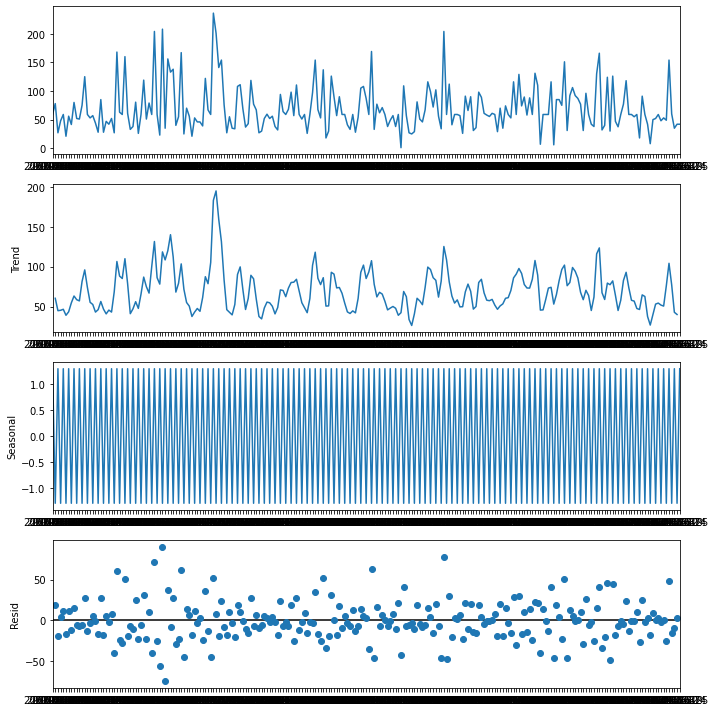

In [11]:
# Additive Results
print('Additive')
plt.rcParams.update({'figure.figsize': (10,10)})
add_results.plot()
plt.show()

Multiplicative


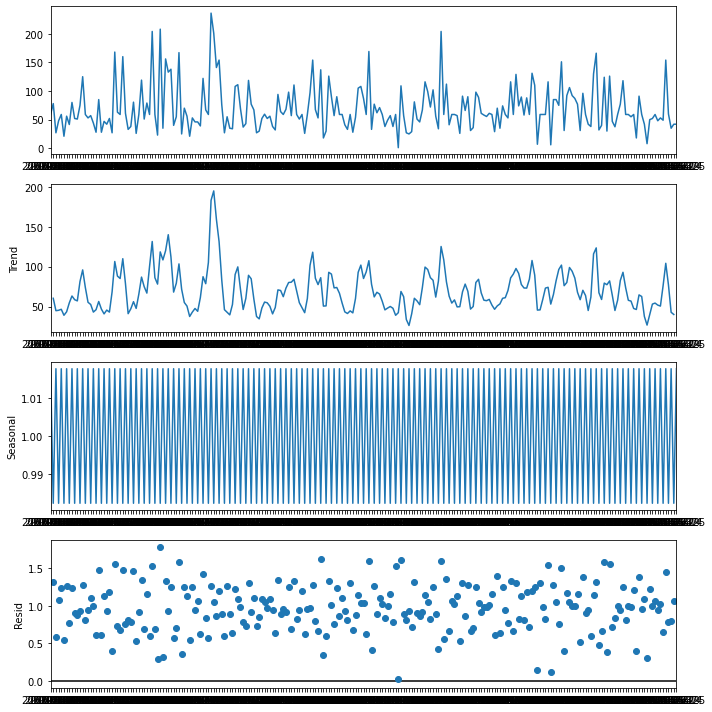

In [12]:
# Multiplicative Results
print('Multiplicative')
plt.rcParams.update({'figure.figsize': (10,10)})
mult_results.plot()
plt.show()

In [13]:
ml_df = pd.read_csv('ml_df.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ml_df.csv'

In [ ]:
ml_df.columns

In [ ]:
ml_df.CRO.unique()

In [ ]:
ml_df.shape